<a href="https://www.kaggle.com/code/abhilashdas/indian-weather-channel-wee-woo?scriptVersionId=141669652" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly
import plotly.express as px
import plotly.graph_objects as go

import phik

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import plotly.graph_objects as go

fig = go.Figure(go.Scattergeo())
fig.update_geos(projection_type="orthographic")
fig.update_layout(height=300, width=900, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [3]:
df = pd.read_csv('/kaggle/input/indian-weather-repository-daily-snapshot/IndianWeatherRepository.csv')

In [4]:
num_cols = df.dtypes[df.dtypes != 'object'].index
print('Numeric Columns are:\n', list(num_cols))
print("\n*"*3, '\n')
obj_cols = df.dtypes[df.dtypes == 'object'].index
print('Object columns are:\n', list(obj_cols))

Numeric Columns are:
 ['latitude', 'longitude', 'last_updated_epoch', 'temperature_celsius', 'temperature_fahrenheit', 'wind_mph', 'wind_kph', 'wind_degree', 'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km', 'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'moon_illumination']

*
*
* 

Object columns are:
 ['country', 'location_name', 'region', 'timezone', 'last_updated', 'condition_text', 'wind_direction', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase']


In [5]:
df.head()

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,Partly cloudy,12.8,20.5,281,WNW,1008.0,29.77,0.0,0.0,67,26,29.7,85.5,10.0,6.0,7.0,14.8,23.8,243.7,45.8,1.7,3.1,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,Sunny,9.6,15.5,287,WNW,1008.0,29.78,0.0,0.0,70,19,30.0,86.0,10.0,6.0,7.0,11.2,18.0,240.3,38.3,2.1,2.6,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,Partly cloudy,11.4,18.4,317,NW,1009.0,29.78,0.0,0.0,70,51,28.2,82.8,10.0,6.0,7.0,13.2,21.2,220.3,57.2,0.6,1.7,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,Cloudy,10.5,16.9,297,WNW,1009.0,29.80,0.0,0.0,76,65,27.6,81.7,10.0,6.0,6.0,13.0,20.9,200.3,25.0,1.2,1.1,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,Cloudy,10.1,16.2,274,W,1009.0,29.79,0.0,0.0,74,82,29.9,85.8,10.0,6.0,6.0,11.6,18.7,257.0,30.8,2.2,1.8,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93


In [6]:
df['country'].unique()   ### So all readings are from India

array(['India'], dtype=object)

In [7]:
df.groupby('timezone').agg('count')
# 3 different timezones

,country,location_name,region,latitude,longitude,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
timezone,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Asia/Dhaka,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Asia/Karachi,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Asia/Kolkata,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175


In [8]:
# let's only focus on data from 1 timezone
df = df[df['timezone'] == 'Asia/Kolkata']

In [9]:
all_states = df['region'].unique()
print(all_states, '\n')
print('*\n'*3)
print('Some states are missing, they are: ') 

['Madhya Pradesh' 'Uttar Pradesh' 'Orissa' 'Rajasthan' 'Gujarat'
 'Himachal Pradesh' 'Chhattisgarh' 'Jammu and Kashmir' 'Daman and Diu'
 'Dadra and Nagar Haveli' 'Andhra Pradesh' 'Jharkhand' 'Bihar'
 'West Bengal' 'Maharashtra' 'Haryana' 'Chandigarh' 'Goa'
 'Andaman and Nicobar Islands' 'Arunachal Pradesh' 'Assam' 'Puducherry'
 'Kerala' 'Mizoram' 'Manipur' 'Nagaland' 'Tripura' 'Karnataka'
 'Uttarakhand' 'Lakshadweep' 'Punjab' 'Tamil Nadu' 'Delhi'] 

*
*
*

Some states are missing, they are: 


| State | Union Territory |
| --- | --- |
| Telangana | Ladakh |
|  | Delhi |



# Grouping of features

In [10]:
# print(df.columns)
df['last_updated'] = pd.to_datetime(df['last_updated'], format='%Y-%m-%d %H:%M:%S')
# converting to datetime format


In [11]:
from datetime import datetime, timedelta

dates = df['last_updated'].unique()
print(dates)

twenty_four_hours_ago = np.datetime64(datetime.now() - timedelta(hours=24))
newer_than_24hr = dates[dates > twenty_four_hours_ago]
print('\n\n',newer_than_24hr)
# df[df['last_updated'] == '2023-08-31 05:15']

['2023-08-29T10:45:00.000000000' '2023-08-30T08:45:00.000000000'
 '2023-08-30T09:00:00.000000000' '2023-08-31T05:15:00.000000000'
 '2023-08-31T05:30:00.000000000' '2023-09-01T05:15:00.000000000']


 ['2023-09-01T05:15:00.000000000']


In [12]:
last_24_hr = []

for i in range(len(newer_than_24hr)):
#     print(i)
    last_24_hr.append(df[df['last_updated'] == newer_than_24hr[i]])
    
last_24_hr = pd.concat(last_24_hr, ignore_index=True)

In [13]:
print('Datapoints within the last 24hours: ' , last_24_hr.shape[0])

Datapoints within the last 24hours:  541


In [14]:
last_24_hr.head() ### This variable now contains all the weather data on ...
# India within the last 24 hours(timezone: Asia/Kolkata)

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693525500,2023-09-01 05:15:00,24.2,75.6,Clear,8.3,13.3,279,W,1008.0,29.76,0.0,0.0,77,12,26.0,78.8,10.0,6.0,1.0,16.8,27.0,270.4,48.6,1.8,1.4,38.3,52.7,2,4,06:00 AM,06:39 PM,07:09 PM,05:59 AM,Waning Gibbous,100
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693525500,2023-09-01 05:15:00,24.0,75.2,Clear,4.3,6.8,262,W,1008.0,29.76,0.0,0.0,74,8,25.8,78.4,10.0,6.0,1.0,8.5,13.7,390.5,22.7,4.8,2.2,43.8,56.3,3,5,06:00 AM,06:38 PM,07:07 PM,06:00 AM,Waning Gibbous,100
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693525500,2023-09-01 05:15:00,22.5,72.5,Partly cloudy,4.3,6.8,323,NW,1009.0,29.78,0.0,0.0,74,36,24.7,76.5,10.0,6.0,1.0,8.9,14.4,263.7,30.4,2.4,0.5,33.6,48.9,2,3,05:57 AM,06:32 PM,07:02 PM,05:56 AM,Waning Gibbous,100
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693525500,2023-09-01 05:15:00,22.8,73.0,Partly cloudy,2.2,3.6,219,SW,1008.0,29.78,0.0,0.0,76,46,24.9,76.8,10.0,6.0,1.0,0.4,0.7,300.4,10.2,4.2,0.4,25.0,33.2,2,3,06:01 AM,06:36 PM,07:06 PM,06:01 AM,Waning Gibbous,100
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693525500,2023-09-01 05:15:00,24.1,75.4,Partly cloudy,2.2,3.6,259,W,1008.0,29.76,0.0,0.0,73,27,25.8,78.4,10.0,6.0,1.0,4.7,7.6,417.2,1.0,5.2,0.4,44.0,59.1,3,5,06:01 AM,06:38 PM,07:07 PM,06:01 AM,Waning Gibbous,100


In [15]:
last_24_hr_Weather = last_24_hr[['location_name', 'region', 'latitude', 'longitude',
                         'last_updated',
                       'temperature_celsius',
                       'condition_text', 'wind_kph',
                       'wind_degree', 'wind_direction', 'pressure_mb', 
                       'precip_mm', 'humidity', 'cloud', 'feels_like_celsius',
                       'visibility_km', 
                       'uv_index', 'gust_kph']]
### We have dropped some columns

In [16]:
last_24_hr_AirQuality = last_24_hr[['air_quality_Carbon_Monoxide',
                       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
                       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
                       'air_quality_us-epa-index', 'air_quality_gb-defra-index']]

In [17]:
last_24_hr_AstronomicalPhenemenon = last_24_hr[['sunrise',
                       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination']]

In [18]:
last_24_hr_Weather.columns

Index(['location_name', 'region', 'latitude', 'longitude', 'last_updated',
       'temperature_celsius', 'condition_text', 'wind_kph', 'wind_degree',
       'wind_direction', 'pressure_mb', 'precip_mm', 'humidity', 'cloud',
       'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph'],
      dtype='object')

In [19]:
last_24_hr_Weather = last_24_hr_Weather.assign(Ult_location=last_24_hr_Weather['location_name'] + '-' + last_24_hr_Weather['region'] + ' @ ' + last_24_hr_Weather['last_updated'].astype(str))

I'am unable to set the location to india when the Map opens, so **YOU NEED TO INTERACT AND MOVE TO INDIA** by yourself, any help will be appreciated and thanked for

# Weather 

In [20]:
fig = go.Figure(data=go.Scattergeo(
    lat = last_24_hr_Weather['latitude'],
    lon = last_24_hr_Weather['longitude'],
    text = last_24_hr_Weather['Ult_location'].astype(str) + last_24_hr_Weather['temperature_celsius'].astype(str) + ' *C',
    marker = dict(
        color = last_24_hr_Weather['temperature_celsius'],
        colorscale = 'temps',
        reversescale = False,
        opacity = 0.7,
        size = 3.5,
        colorbar = dict(
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            showticksuffix = "last",
#             dtick = 0.1
        )
    )
))


fig.update_layout(
    geo = dict(

        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
#         center=dict(
#             lat=20.5937,
#             lon=78.9629
#         ),
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title='Indian Weather Temperature (°C) within the last 24 hours',
)

# fig.update_layout(
#             geo = dict(  
#                 center=dict(
#                     lat=20.5937,
#                     lon=78.9629)
#             )
# )
fig.show()

*I'll try folium, maybe it will work better?*

In [21]:
last_24_hr_Weather.head(4)

,location_name,region,latitude,longitude,last_updated,temperature_celsius,condition_text,wind_kph,wind_degree,wind_direction,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,Ult_location
0,Ashoknagar,Madhya Pradesh,24.57,77.72,2023-09-01 05:15:00,24.2,Clear,13.3,279,W,1008.0,0.0,77,12,26.0,10.0,1.0,27.0,Ashoknagar-Madhya Pradesh @ 2023-09-01 05:15:00
1,Raisen,Madhya Pradesh,23.33,77.80,2023-09-01 05:15:00,24.0,Clear,6.8,262,W,1008.0,0.0,74,8,25.8,10.0,1.0,13.7,Raisen-Madhya Pradesh @ 2023-09-01 05:15:00
2,Chhindwara,Madhya Pradesh,22.07,78.93,2023-09-01 05:15:00,22.5,Partly cloudy,6.8,323,NW,1009.0,0.0,74,36,24.7,10.0,1.0,14.4,Chhindwara-Madhya Pradesh @ 2023-09-01 05:15:00
3,Betul,Madhya Pradesh,21.86,77.93,2023-09-01 05:15:00,22.8,Partly cloudy,3.6,219,SW,1008.0,0.0,76,46,24.9,10.0,1.0,0.7,Betul-Madhya Pradesh @ 2023-09-01 05:15:00


# Temperature within the last 24 hours

In [22]:
import folium
from folium.plugins import HeatMap

# Create a base map centered at a location
m = folium.Map(location=[last_24_hr_Weather['latitude'].mean(), last_24_hr_Weather['longitude'].mean()], zoom_start=4.7)

# Combine latitude and longitude into a list of lists
heat_data = [[row['latitude'], row['longitude'], row['temperature_celsius']] for index, row in last_24_hr_Weather.iterrows()]

# Create a HeatMap layer and add it to the map
HeatMap(heat_data, radius=15).add_to(m)

# Display the map
m.save('temperature_heatmap.html')




# Create a marker cluster layer
marker_cluster = folium.plugins.MarkerCluster()
for index, row in last_24_hr_Weather.iterrows():
    # Choose the marker color based on the temperature value
    if row['temperature_celsius'] < 15:
        color = 'blue'
    elif row['temperature_celsius'] < 25:
        color = 'green'
    elif row['temperature_celsius'] < 35:
        color = 'orange'
    else:
        color = 'red'
    # Create a marker with a popup and an icon
    popup = f"{row['location_name']}<br>Temperature: {row['temperature_celsius']} °C"
    icon = folium.Icon(color=color)
    marker = folium.Marker(location=[row['latitude'], row['longitude']], popup=popup, icon=icon)
    # Add the marker to the cluster
    marker_cluster.add_child(marker)
marker_cluster.add_to(m)




m

Ehhhh, good enough

 **I've grouped the provided features into relevant categories. Here's the information in a tabular format:**


| **Location Information** | **Temperature** | **Weather Condition** | **Wind** | **Atmospheric Measurements** | **UV Index** | **Air Quality Measurements** | **Astronomical Data** |
|--------------------------|-----------------|-----------------------|---------|-----------------------------|--------------|-----------------------------|----------------------|
| location_name            | temperature_celsius | condition_text   | wind_kph | pressure_mb                 | uv_index     | air_quality_Carbon_Monoxide | sunrise          |
| region                   | feels_like_celsius |                   | wind_degree | precip_mm                   |              | air_quality_Ozone           | sunset           |
| latitude                 |                 |                   | wind_direction | humidity                   |              | air_quality_Nitrogen_dioxide | moonrise         |
| longitude                |                 |                   | gust_kph | cloud                       |              | air_quality_Sulphur_dioxide | moonset          |
| last_updated             |                 |                   |           | visibility_km               |              | air_quality_PM2.5           | moon_phase        |
|                          |                 |                   |           |                           |              | air_quality_PM10            | moon_illumination |

# ********||************||************🐨 A lovely Earth ☁️ 🌏**********||*********************||****

In [23]:
!pip install basemap
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 37.4 MB/s eta 0:00:00


In [24]:
# # import basemap as Basemap

# m = Basemap(projection='cyl', llcrnrlon=90, llcrnrlat=-15, urcrnrlon=150, urcrnrlat=15, resolution='i')
# m.drawcoastlines(1)
# m.drawcountries()

# parallels = np.arange(-15,15+0.25,5)
# m.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
# meridians = np.arange(90,150+0.25,10)
# m.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)

In [25]:
last_24_hr_Weather.head(2)

,location_name,region,latitude,longitude,last_updated,temperature_celsius,condition_text,wind_kph,wind_degree,wind_direction,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,Ult_location
0,Ashoknagar,Madhya Pradesh,24.57,77.72,2023-09-01 05:15:00,24.2,Clear,13.3,279,W,1008.0,0.0,77,12,26.0,10.0,1.0,27.0,Ashoknagar-Madhya Pradesh @ 2023-09-01 05:15:00
1,Raisen,Madhya Pradesh,23.33,77.80,2023-09-01 05:15:00,24.0,Clear,6.8,262,W,1008.0,0.0,74,8,25.8,10.0,1.0,13.7,Raisen-Madhya Pradesh @ 2023-09-01 05:15:00


In [26]:
u = last_24_hr_Weather["wind_kph"] * np.cos(np.radians(last_24_hr_Weather["wind_degree"]))
v = last_24_hr_Weather["wind_kph"] * np.sin(np.radians(last_24_hr_Weather["wind_degree"]))

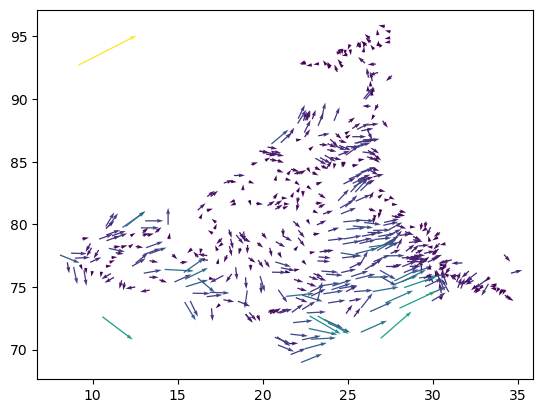

In [27]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


u = last_24_hr_Weather["wind_kph"] * np.cos(np.radians(last_24_hr_Weather["wind_degree"]))
v = last_24_hr_Weather["wind_kph"] * np.sin(np.radians(last_24_hr_Weather["wind_degree"]))

plt.figure()
plt.quiver(last_24_hr_Weather["latitude"], last_24_hr_Weather["longitude"], u, v, last_24_hr_Weather["wind_kph"],angles=270-last_24_hr_Weather["wind_degree"], cmap=cm.viridis)

In [28]:
import plotly.figure_factory as ff
import numpy as np

x, y = np.meshgrid(np.arange(0, 2, .2), np.arange(0, 2, .2))
u = np.cos(x) * y
v = np.sin(x) * y

fig = ff.create_quiver(x, y, u, v)
fig.show()

In [29]:
# cf = plt.contourf(last_24_hr_Weather['longitude'],last_24_hr_Weather['latitude'],last_24_hr_Weather['wind_kph'], cmap='jet')
# cb = plt.colorbar(cf, fraction=0.0235, pad=0.03 )
# cb.set_label('m/s',  fontsize=15)

# plt.show()